In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import optimize
from scipy.integrate import odeint
from sklearn import linear_model

### Model
I: Infected <br>
S: Susceptible<br>
R: Recovered<br>
D: Deceased<br>
H: Hospital beds<br>
(1) I + S --> 2I <br>
(2) I --> R <br>
(3) I --> D <br>
(4) I + H --> IH <br>
(5) IH --> R + H<br>
(6) IH --> D + H<br>


In [17]:
k = [.1,.5,.1,5,.7,.05]

0

In [175]:
def Sim(k=None,y0=None,tmax = 10):
    # Reaction Constants
    k1 = .1 if k is None else k[0]
    k2 = .5 if k is None else k[1]
    k3 = .1 if k is None else k[2]
    k4 = 5 if k is None else k[3]
    k5 = .7 if k is None else k[4]
    k6 = .05 if k is None else k[5]

    # Initial Populations
    S0 = 1 if y0 is None else y0[0]
    I0 = 5/10000 if y0 is None else y0[0]
    R0 = 0 if y0 is None else y0[0]
    D0 = 0 if y0 is None else y0[0]
    H0 = 2.589/1000 if y0 is None else y0[0]
    IH0 = 0 if y0 is None else y0[0]

    t = np.linspace(0,tmax,1000)
    def odefun(y,t):
        S = y[0]
        I = y[1]
        R = y[2]
        D = y[3]
        H = y[4]
        IH= y[5]

        rate1 = k1*I*S
        rate2 = k2*(I+IH)
        rate3 = k3*(I+IH)
        rate4 = k4*H*I
        rate5 = k5*IH
        rate6 = k6*IH

        dy = [-rate1,
             rate1-rate2-rate3-rate4,
             rate2+rate5,
             rate3+rate6,
              -rate4+rate5+rate6,
              rate4-rate5-rate6
             ]
        return dy
    y = odeint(odefun,[S0,I0,R0,D0,H0,IH0],t)
#     print(odefun([S0,I0,R0,D0,H0,IH0],t))
    S = y[:,0]
    I = y[:,1]
    R = y[:,2]
    D = y[:,3]
    H = y[:,4]
    IH= y[:,5]
    plt.figure(figsize=(16,4))
    for i in range(4):
        plt.plot(t,y[:,i])
    plt.plot(t,np.ones_like(H)*H[0],'r--')
    plt.legend(['S','I','R','D'])
#     plt.figure()
#     plt.plot(t,H)
#     plt.plot(t,IH)
#     plt.legend(['H','IH'])
    print('Info:')
    print(f'Total number of Infected (Thousands): {(S[0]-S[-1]):.2f}')
    print(f'Total number of Deaths (Thousands): {D[-1]:.2f}')
    print(f'Percent of population Infected: {(S[0]-S[-1])/S[0]*100:.1f} %')
    print(f'Percent of population Died: {D[-1]/S[0]*100:.1f} %')
    print(f'Mortality rate: {D[-1]/(S[0]-S[-1])*100:.1f} %')
    
    return y

Info:
Total number of Infected (Thousands): 0.97
Total number of Deaths (Thousands): 0.09
Percent of population Infected: 96.6 %
Percent of population Died: 8.7 %
Mortality rate: 9.0 %


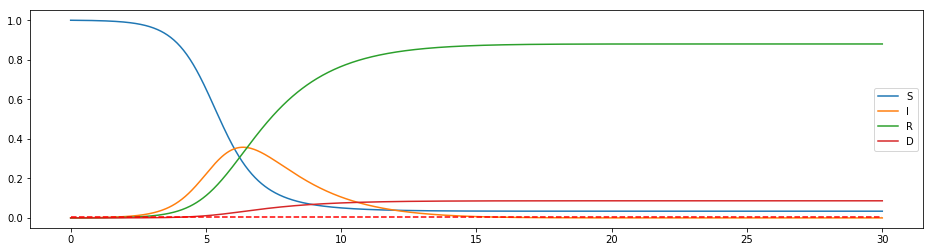

In [176]:
k=np.zeros(6)
k[0] = 2 # Infection spreading
k[1] = 0.5 # Recovered (Unassisted)
k[2] = 0.05 # Deceased (Unassisted)
k[3] = 5e1    # Hospitalizatio
k[4] = 0.7 # Recovered (Assisted)
k[5] = 0.02 #Deceased (Assisted)

Sim(k=k,tmax = 30);

Info:
Total number of Infected (Thousands): 1.00
Total number of Deaths (Thousands): 0.19
Percent of population Infected: 100.0 %
Percent of population Died: 19.4 %
Mortality rate: 19.4 %


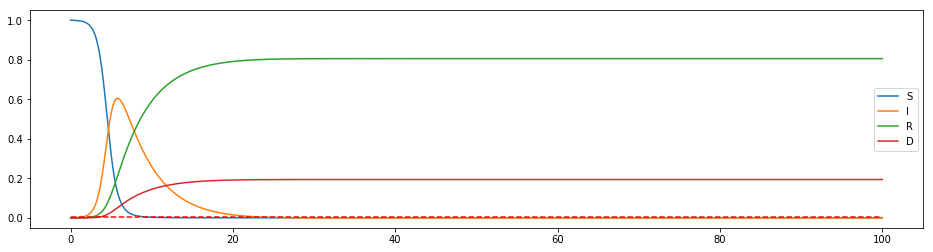

In [177]:
Sim(k = [2.,.2,.05,50,.7,.02],tmax = 100);

Info:
Total number of Infected (Thousands): 0.97
Total number of Deaths (Thousands): 0.19
Percent of population Infected: 97.5 %
Percent of population Died: 18.8 %
Mortality rate: 19.3 %


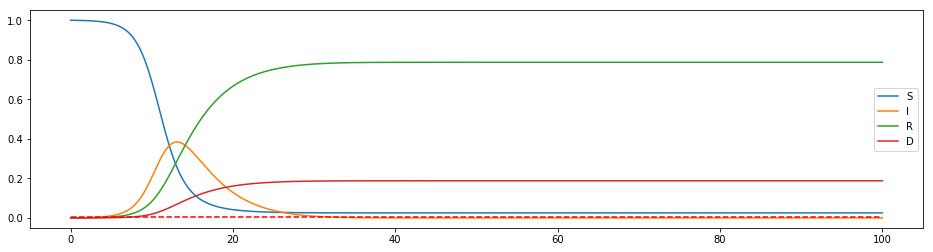

In [178]:
Sim(k = [1.,.2,.05,50,.7,.02],tmax = 100);

Info:
Total number of Infected (Thousands): 0.94
Total number of Deaths (Thousands): 0.18
Percent of population Infected: 93.9 %
Percent of population Died: 18.0 %
Mortality rate: 19.1 %


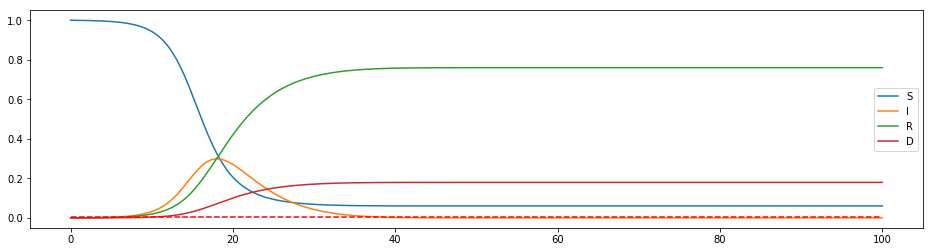

In [181]:
Sim(k = [.8,.2,.05,50,.7,.02],tmax = 100);

Info:
Total number of Infected (Thousands): 0.50
Total number of Deaths (Thousands): 0.09
Percent of population Infected: 50.4 %
Percent of population Died: 8.6 %
Mortality rate: 17.1 %


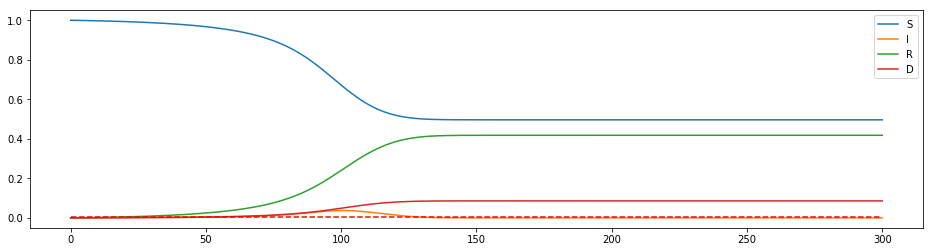

In [187]:
Sim(k = [.45,.2,.05,50,.7,.02],tmax = 300);

In [143]:
# A simple SIR model
def Sim0(k=None,y0=None,tmax = 10):
    # Reaction Constants
    k1 = 1 if k is None else k[0]
    k2 = .5 if k is None else k[1]

    # Initial Populations
    S0 = 1 if y0 is None else y0[0]
    I0 = 1e-3 if y0 is None else y0[1]
    R0 = 0 if y0 is None else y0[2]

    t = np.linspace(0,tmax,100)
    def odefun(y,t):
        S = y[0]
        I = y[1]
        R = y[2]

        rate1 = k1*I*S
        rate2 = k2*I


        dy = [-rate1,
             rate1-rate2,
             rate2
             ]
        return dy
    y = odeint(odefun,[S0,I0,R0],t)
#     print(odefun([S0,I0,R0,D0,H0,IH0],t))
    S = y[:,0]
    I = y[:,1]
    R = y[:,2]

    plt.figure(figsize=(16,4))
    
    plt.plot(t,y)
    plt.legend(['S','I','R'])
#     plt.figure()
#     plt.plot(t,H)
#     plt.plot(t,IH)
#     plt.legend(['H','IH'])
#     print('Info:')
#     print(f'Total number of Infected (Thousands): {(S[0]-S[-1]):.2f}')
#     print(f'Total number of Deaths (Thousands): {D[-1]:.2f}')
#     print(f'Percent of population Infected: {(S[0]-S[-1])/S[0]*100:.1f} %')
#     print(f'Percent of population Died: {D[-1]/S[0]*100:.1f} %')
#     print(f'Mortality rate: {D[-1]/(S[0]-S[-1])*100:.1f} %')
    
    return y

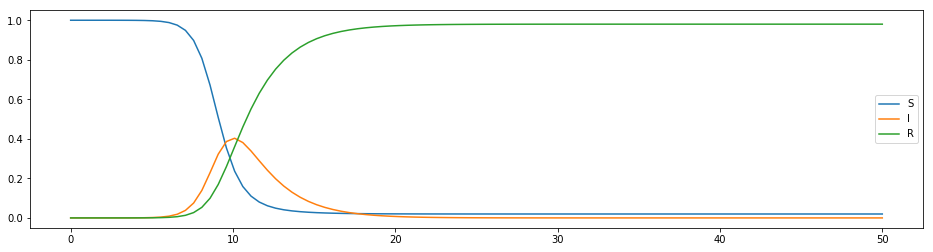

In [149]:
Sim0(k = [2,.5],y0=[1,1e-6,0],tmax=50);

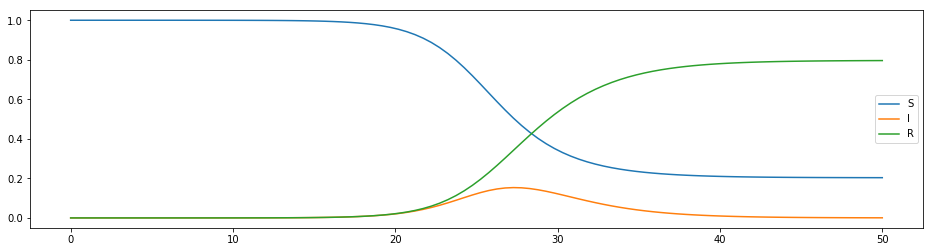

In [148]:
Sim0(k = [1,.5],y0=[1,1e-6,0],tmax=50);